In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a100-chat-benchmark/A100_chat_benchmark.txt
/kaggle/input/anthropic-econ-index-train/anthropic_econ_index.train (1).txt


In [10]:
df = pd.read_csv("/kaggle/input/anthropic-econ-index-train/anthropic_econ_index.train (1).txt", sep=',')

In [11]:
df.head()

,task_name,feedback_loop,directive,task_iteration,validation,learning,filtered
0,accept commissions to create music for special...,0.0,0.000000,0.000000,0.0,0.0,1.000000
1,act as advisers to student organizations.,0.0,0.382979,0.361702,0.0,0.0,0.255319
2,act as an advocate for farmers or farmers' gro...,0.0,0.000000,0.000000,0.0,0.0,1.000000
3,act as an intermediary in negotiations between...,0.0,0.391304,0.434783,0.0,0.0,0.173913
4,act as an intermediary in negotiations between...,0.0,0.391304,0.376812,0.0,0.0,0.231884


In [12]:
df.shape

(3364, 7)

In [13]:
df['feedback_loop'].value_counts()

feedback_loop
0.000000    2887
0.200000       3
0.211268       2
0.174312       2
0.250000       2
            ... 
0.506885       1
0.024188       1
0.172662       1
0.075415       1
0.221613       1
Name: count, Length: 469, dtype: int64

In [15]:
a100_gpu = pd.read_csv('/kaggle/input/a100-chat-benchmark/A100_chat_benchmark.txt', sep=',')

In [16]:
#a100_gpu this dataset is the energy produced by different llms using the A100 NVIDIA GPU


In [19]:
df.nunique()

task_name         3364
feedback_loop      469
directive         1376
task_iteration    1295
validation         358
learning          1292
filtered          1543
dtype: int64

In [24]:
df['feedback_loop'].quantile(1)

0.6666666666666666

In [25]:
df.columns

Index(['task_name', 'feedback_loop', 'directive', 'task_iteration',
       'validation', 'learning', 'filtered'],
      dtype='object')

In [44]:
#frequency table of each task type. excluding filtered

In [41]:
frequency_df = (df.iloc[:, 1:6] > 0).sum()

In [42]:
frequency_df

feedback_loop      477
directive         1749
task_iteration    1542
validation         359
learning          1560
dtype: int64

Text(0, 0.5, 'Frequency')

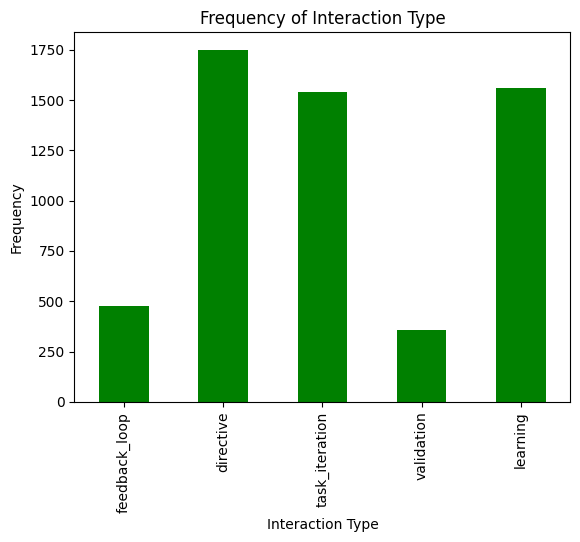

In [45]:
freq_bar = frequency_df.plot(kind='bar', color='green')
plt.title('Frequency of Interaction Type')
plt.xlabel('Interaction Type')
plt.ylabel('Frequency')